> **Project Title:** Customer Segmentaion <br>
> **Name:** Louis Amalye <br>
> **LinkedIN:** https://www.linkedin.com/in/louis-amakye-34358816b/<br>
> **Email:** louisamakye20@gmail.com

## Table of Contents

* [Business Problem Understanding](#bp)
* [Project Goal](#pg)
* [Information Provided](#in)  
* [Exploratory Data Analysis](#tk1)
    * [Importing Libraries](#il)
    * [Loading Data](#ld)
    * [Data Cleaning](#dc)
    * [Merge Data](#md)
    * [Data Visualization](#dv)
* [Data Modelling](#tk2)
    * [RFM Segmentation](#rfm)
    * [Preprocessing](#pre)
    * [Data Training](#sa)
* [Conclusion and Recommendation](#cr) 
* [Reference](#ref) 

## Business Problem Understanding<a id='bp'></a>

The marketing department at Sprocket Central Pty Ltd are planning to undertake new marketing campaign, however due to limited resource, they would like to know which of their customer demography should they target in this campaign. 

###  Project Goal <a id='pg'></a>

<p style="text-align:justify;">In this project, I seek to provide data-driven suggestions for HR by achieving the following goals;</p>

* Draw unique insights the sale data to assist the marketing department.
* Perform RFM Segmentation and KMeans Clustering to Segment Customers.

### Information Provided <a id='in'></a>

The link to the [dataset](https://www.kaggle.com/datasets/adriandiazny/sprocket-central-mock-data)

## Exploratory Data Analysis<a id='tk1'></a>

### Section 1 - Importing Libraries <a id ='il'></a>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
from IPython.display import Image
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd


import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score

%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 150)
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] =(10,6)
plt.rcParams["figure.facecolor"] = "#00000000"

### Section 2 - Loading Data <a id ='ld'></a>

In [2]:
# load file
df_transaction = pd.read_excel("Transactions.xlsx")
df_customerDemo = pd.read_excel("CustomerDemographic.xlsx")
df_address = pd.read_excel("CUSTOMERADDRESS.xlsx")

In [3]:
df_newcustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,Queensland,Australia,6
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victory,Australia,5
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,Queensland,Australia,1
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9


In [5]:
df_customerDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,Yes,8.0


In [6]:
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
df_address.head()

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,10
1,2,6 Meadow Vale Court,2153,New South Wales,10
2,4,0 Holy Cross Court,4211,Queensland,9
3,5,17979 Del Mar Point,2448,New South Wales,4
4,6,9 Oakridge Court,3216,Victoria,9


---

### Section 3 - Data cleaning<a id ='dc'></a>

In [9]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [10]:
df_customerDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

In [12]:
from datetime import datetime

# Convert "Date of Birth" to datetime
def compute_age(df, col):
       
    df[col] = pd.to_datetime(df[col])
    current_date = datetime.now()
    df['Age'] = (current_date - df[col]).astype('<m8[Y]')
    df = df.drop(columns=[col])
    
    return df
    


In [14]:
df_customerDemo = compute_age(df_customerDemo,"DOB")
df_customerDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,42.0
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,Yes,15.0,69.0
3,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,No,7.0,62.0
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8.0,46.0


In [15]:
df_transaction['product'] = df_transaction['brand'] + '-' + df_transaction['product_line'] + '-' + df_transaction['product_class']

In [16]:
df_customerDemo["gender"].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [18]:
df_customerDemo = df_customerDemo[df_customerDemo["gender"]!="U"]
df_transaction = df_transaction[df_transaction["order_status"]!="Cancelled"]
df_customerDemo["job_industry_category"] = df_customerDemo["job_industry_category"].fillna("Manufacturing")


### Section 4 - Merge Dataframe <a id ='md'></a>

In [19]:
# Merge the df_customerDemo  and df_address  based on the customer_id column
def merge_dataframe(df1,df2, col):
    merged_df = pd.merge(df1, df2, on=col)
    
    return merged_df


In [20]:
df1 = merge_dataframe(df_customerDemo,df_address, "customer_id")

In [21]:
df_final = merge_dataframe(df1,df_transaction,"customer_id")
df_final.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,address,postcode,state,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,060 Morning Avenue,2016,New South Wales,10,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,OHM Cycles-Standard-medium
1,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,060 Morning Avenue,2016,New South Wales,10,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,Solex-Standard-medium
2,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,060 Morning Avenue,2016,New South Wales,10,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,Trek Bicycles-Road-low
3,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,060 Morning Avenue,2016,New South Wales,10,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,Norco Bicycles-Standard-medium
4,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,060 Morning Avenue,2016,New South Wales,10,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,Solex-Standard-medium


In [22]:
df_final.describe()

,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,19337.000000,19337.000000,19337.000000,19337.000000,19337.000000,19337.000000,19337.000000,18992.000000,19337.000000,19152.000000,19152.000000
mean,48.936340,10.667942,45.670735,2987.538036,7.515023,9999.678647,45.329679,0.499789,1106.030320,555.525439,38203.065998
std,28.648053,5.672744,12.613585,852.365333,2.827841,5771.366019,30.745483,0.500013,583.118739,405.731333,2874.383769
min,0.000000,1.000000,21.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,24.000000,6.000000,36.000000,2200.000000,6.000000,5006.000000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,48.000000,11.000000,46.000000,2767.000000,8.000000,9994.000000,44.000000,0.000000,1163.890000,507.580000,38216.000000
75%,73.000000,15.000000,55.000000,3752.000000,10.000000,14995.000000,72.000000,1.000000,1635.300000,795.100000,40672.000000
max,99.000000,22.000000,92.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [23]:
def duplicate_row(data):
    """
    Check for duplicate rows

    Parameters:
    data(Dataframe)

    Returns
    pd.DataFrame: A merged DataFrame
    """
    duplicate_rows = data.duplicated()
    duplicate_df = data[duplicate_rows]
    return duplicate_df

In [25]:
duplicate_row(df_final)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,address,postcode,state,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product


In [26]:
df_final.nunique()

customer_id                             3411
first_name                              2776
last_name                               3192
gender                                     2
past_3_years_bike_related_purchases      100
job_title                                195
job_industry_category                      9
wealth_segment                             3
owns_car                                   2
tenure                                    22
Age                                       55
address                                 3409
postcode                                 829
state                                      3
property_valuation                        12
transaction_id                         19337
product_id                               101
transaction_date                         364
online_order                               2
order_status                               1
brand                                      6
product_line                               4
product_cl

### Section 5 - Dada Visualization <a id ='dv'></a>

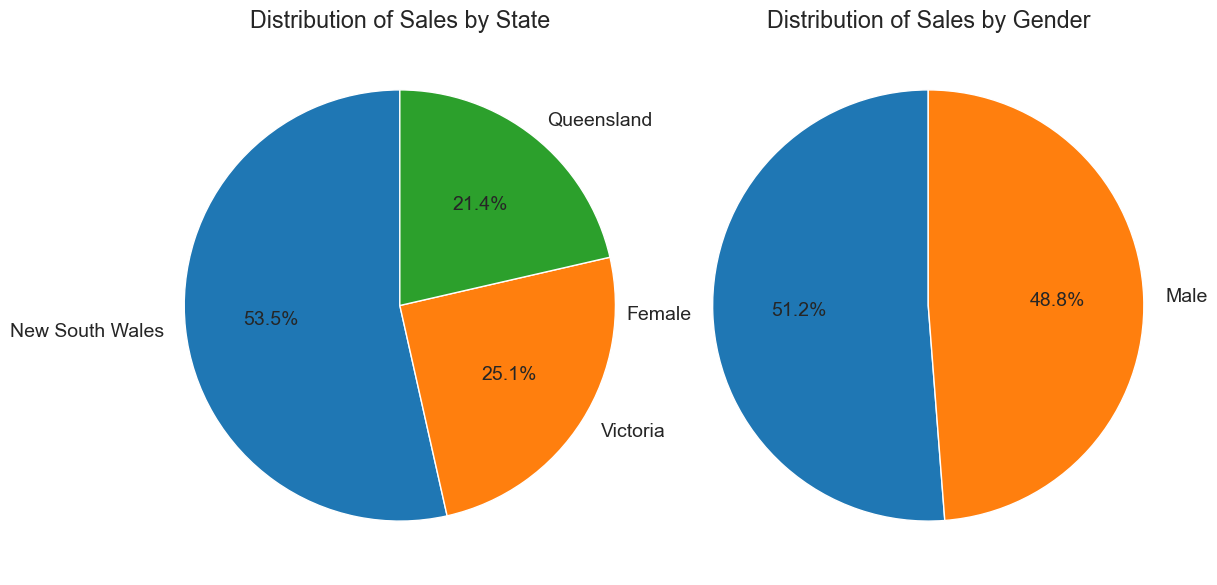

In [27]:
# Count the occurrences of each group
group_counts = df_final['gender'].value_counts()

fig = plt.figure(figsize=(25, 7))
group_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Distribution of Sales by Gender')

f1 = fig.add_subplot(121)
group_counts = df_final['state'].value_counts()
group_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Distribution of Sales by State')
plt.savefig("distribution.png")

from the plot above, more  than 50% of the sales events took place in New South Wales and 25% at Victoria all in Australia.
Female customers are the majority customers for a sale event

create a helper function to facilitate visualization

In [28]:
def aggregate_data(data,tar,car,stat = "sum"):
    df1 = data.groupby([tar])[[car]].agg(stat).reset_index().sort_values(by=car, ascending=True)
    df1[car] = df1[car].apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    return df1

def myplot(df, colname, order=None):
    value_counts = df[colname].value_counts().reindex(index=order)
    plt.bar(value_counts.index, value_counts)
    plt.title(f'Distribution of {colname}'.title(), fontsize =14, weight = "bold")
    plt.xticks(rotation = 90)

    for i, v in enumerate(value_counts):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')

    plt.show()
    
def bar_chart(data, x_col, y_col,title, x_title, y_title):
    plt.barh(data[y_col], data[x_col])
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)

    # Add value labels to the bars
    for i, value in enumerate(data[x_col]):
        plt.text(value, i, str(value), ha="left", va="center", fontweight='bold') 

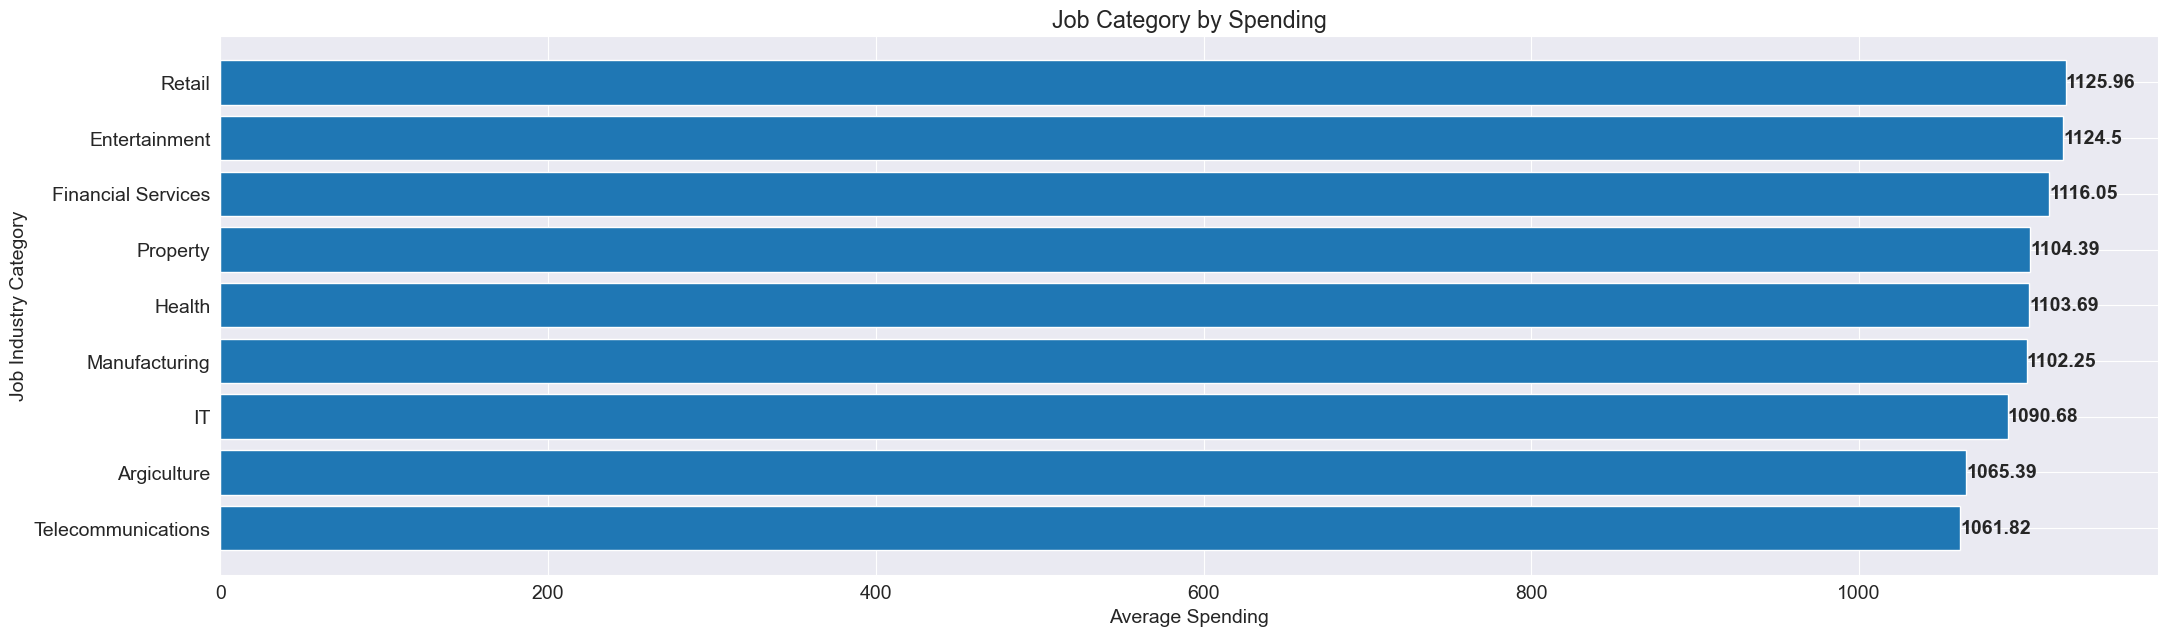

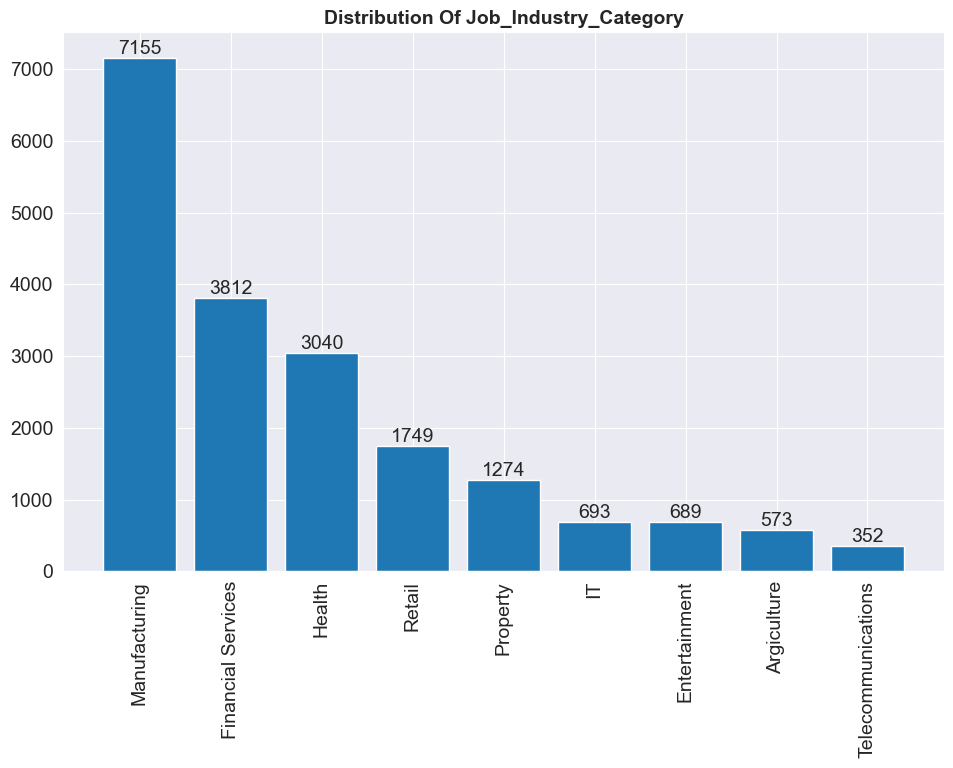

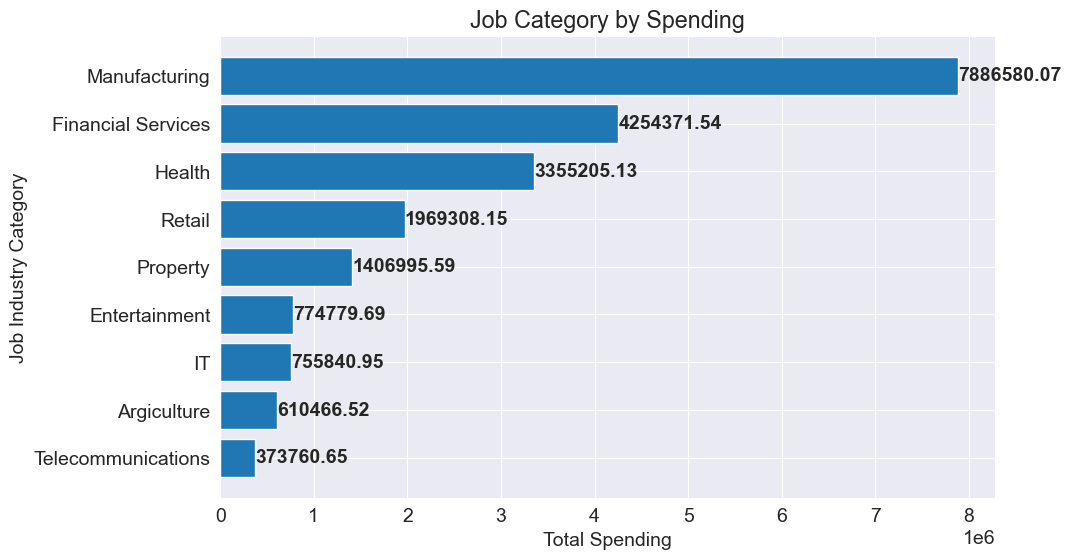

In [29]:
fig = plt.figure(figsize=(25, 7))


bar_chart(aggregate_data(df_final, "job_industry_category", "list_price", stat= "mean"), "list_price", 'job_industry_category', "Job Category by Spending","Average Spending" , 'Job Industry Category')

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(122)
myplot(df_final, "job_industry_category")


f1 = fig.add_subplot(122)
bar_chart(aggregate_data(df_final, "job_industry_category", "list_price", stat= "sum"), "list_price", 'job_industry_category', "Job Category by Spending","Total Spending" , 'Job Industry Category')

from the plot about, customers in the manufacturing sectors spend most of the time However customers in the retail sector recorded highest average spending.  

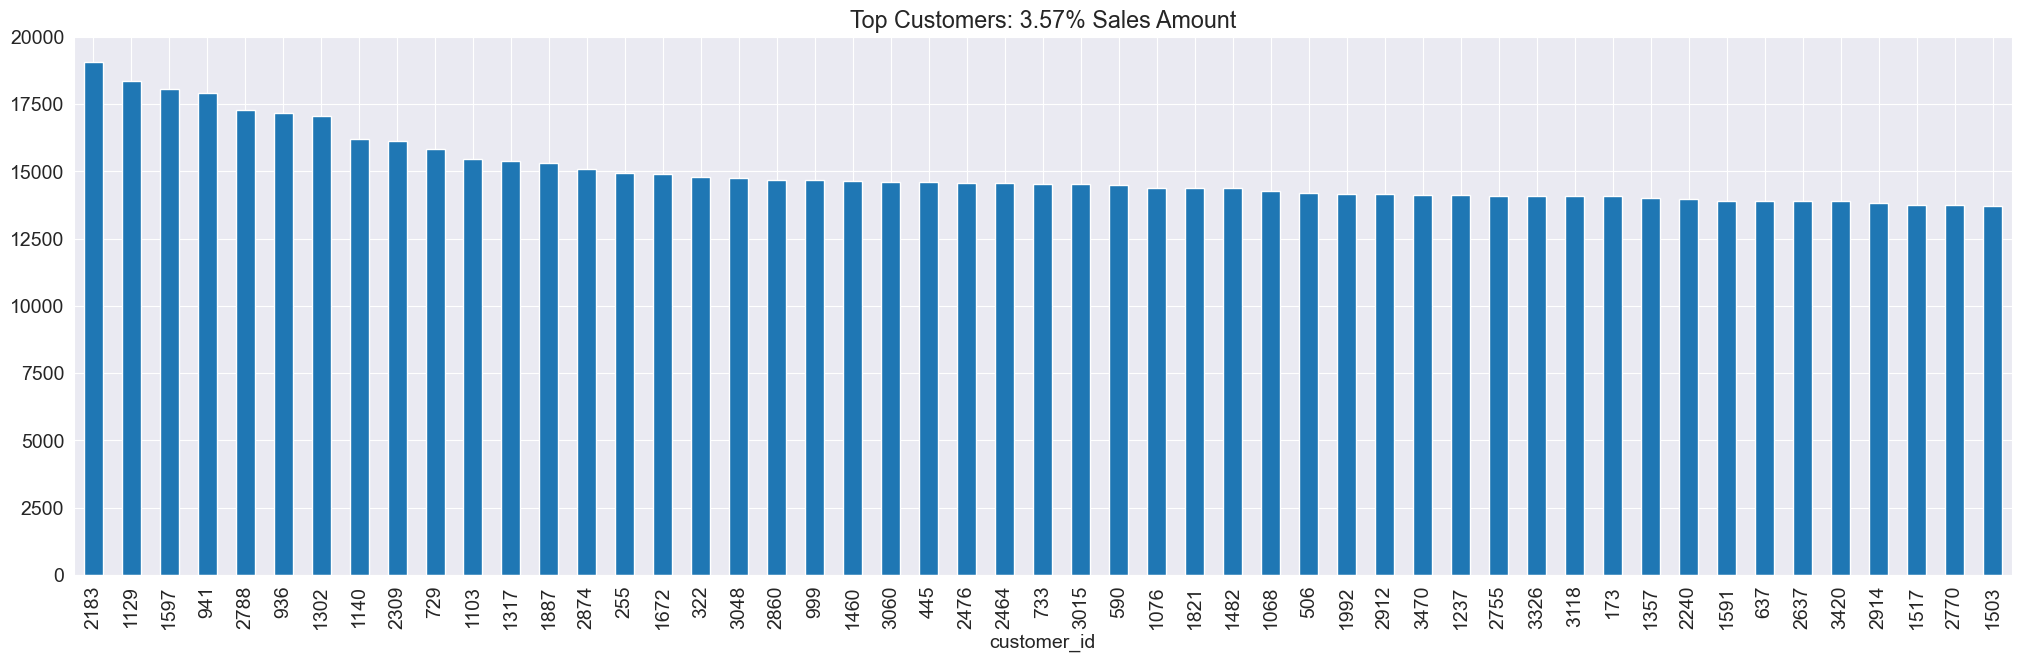

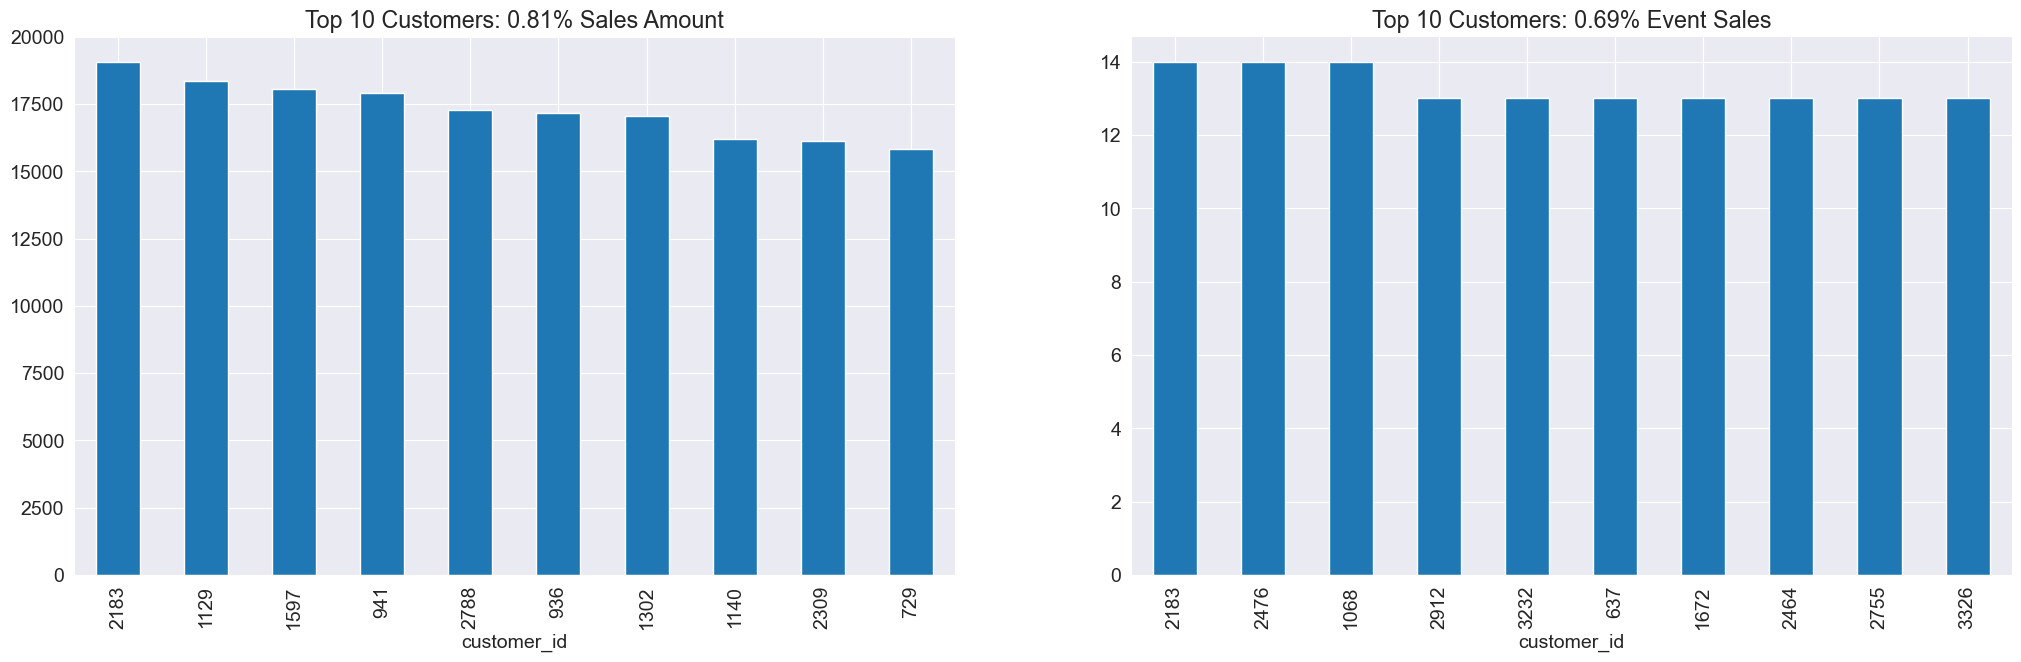

In [30]:
'''code taken from https://www.kaggle.com/code/mgmarques/customer-segmentation-and-market-basket-analysis'''

fig = plt.figure(figsize=(25, 7))
PercentSales = np.round((df_final.groupby(["customer_id"]).list_price.sum().sort_values(ascending=False)[:51].sum() / df_final.groupby(["customer_id"]).list_price.sum().sort_values(ascending=False).sum()) * 100, 2)
g = df_final.groupby(["customer_id"]).list_price.sum().sort_values(ascending=False)[:51].plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))

fig = plt.figure(figsize=(25, 7))
PercentSales = np.round((df_final.groupby(["customer_id"]).list_price.sum().sort_values(ascending=False)[:10].sum() / df_final.groupby(["customer_id"]).list_price.sum().sort_values(ascending=False).sum()) * 100, 2)

f1 = fig.add_subplot(121)
g = df_final.groupby(["customer_id"]).list_price.sum().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amount'.format(PercentSales))

f1 = fig.add_subplot(122)
PercentSales = np.round((df_final.groupby(["customer_id"]).list_price.count().sort_values(ascending=False)[:10].sum() / df_final.groupby(["customer_id"]).list_price.count().sort_values(ascending=False).sum()) * 100, 2)
g = df_final.groupby(["customer_id"]).list_price.count().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Sales'.format(PercentSales))


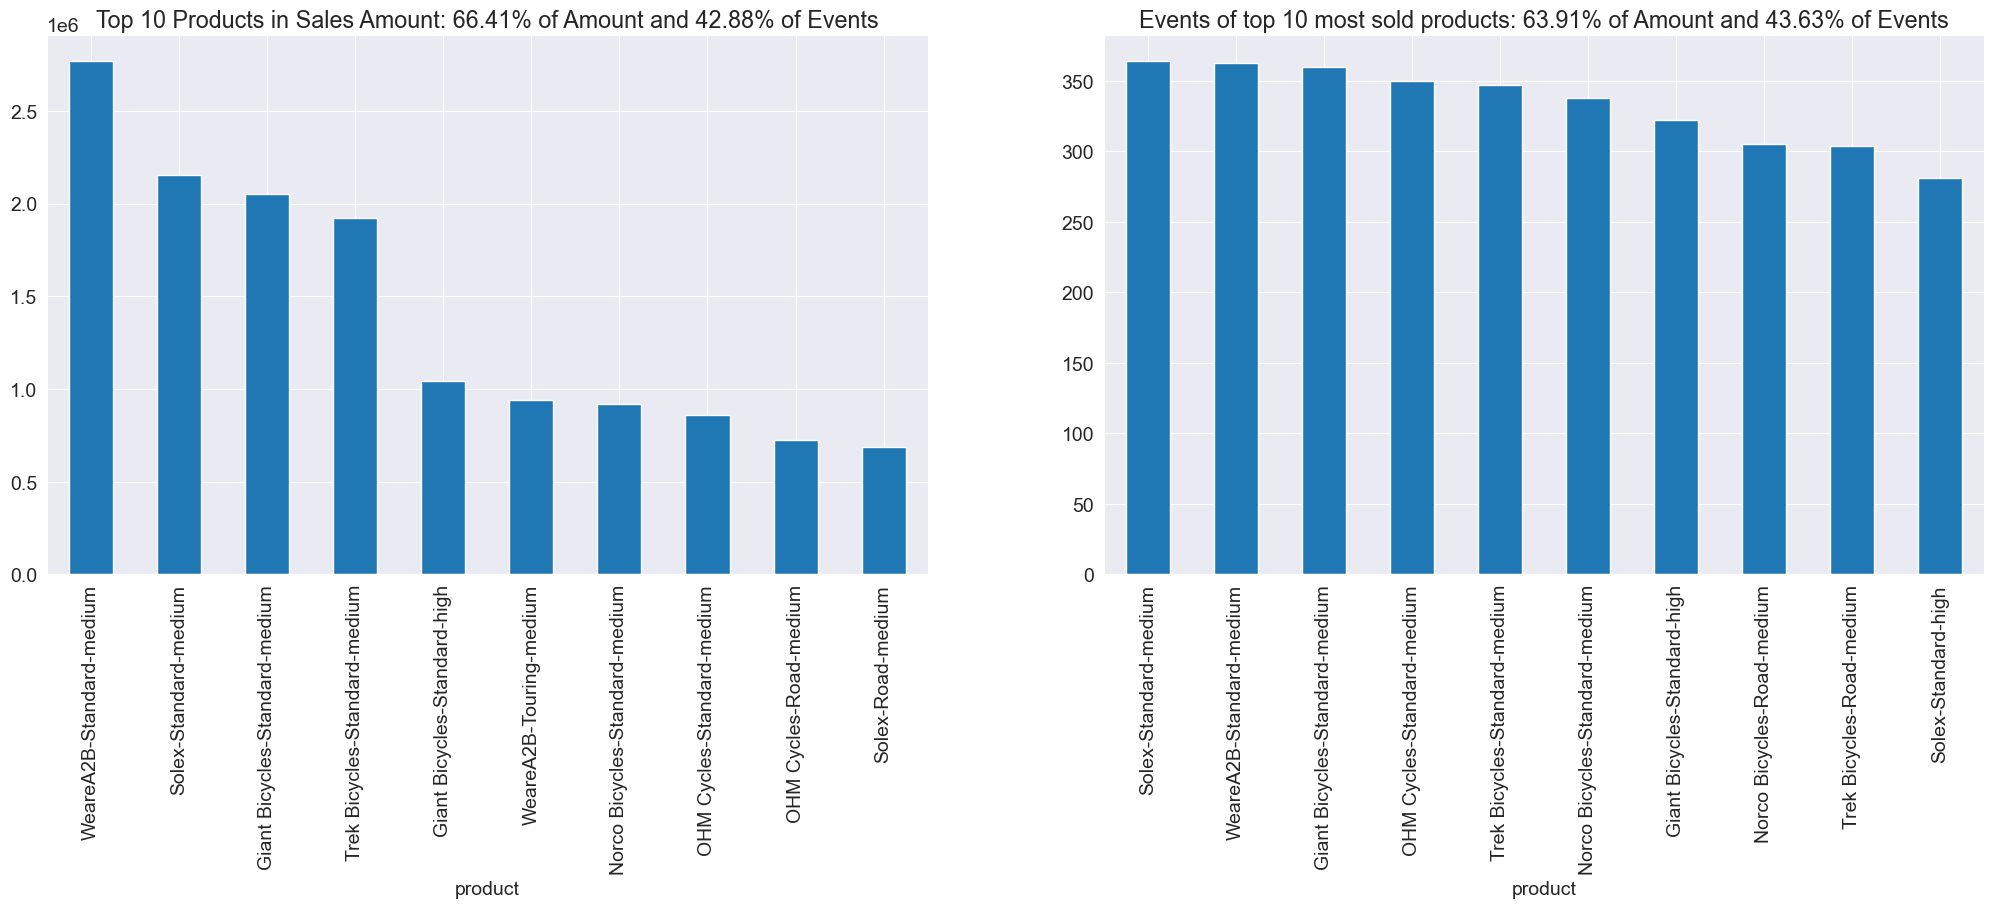

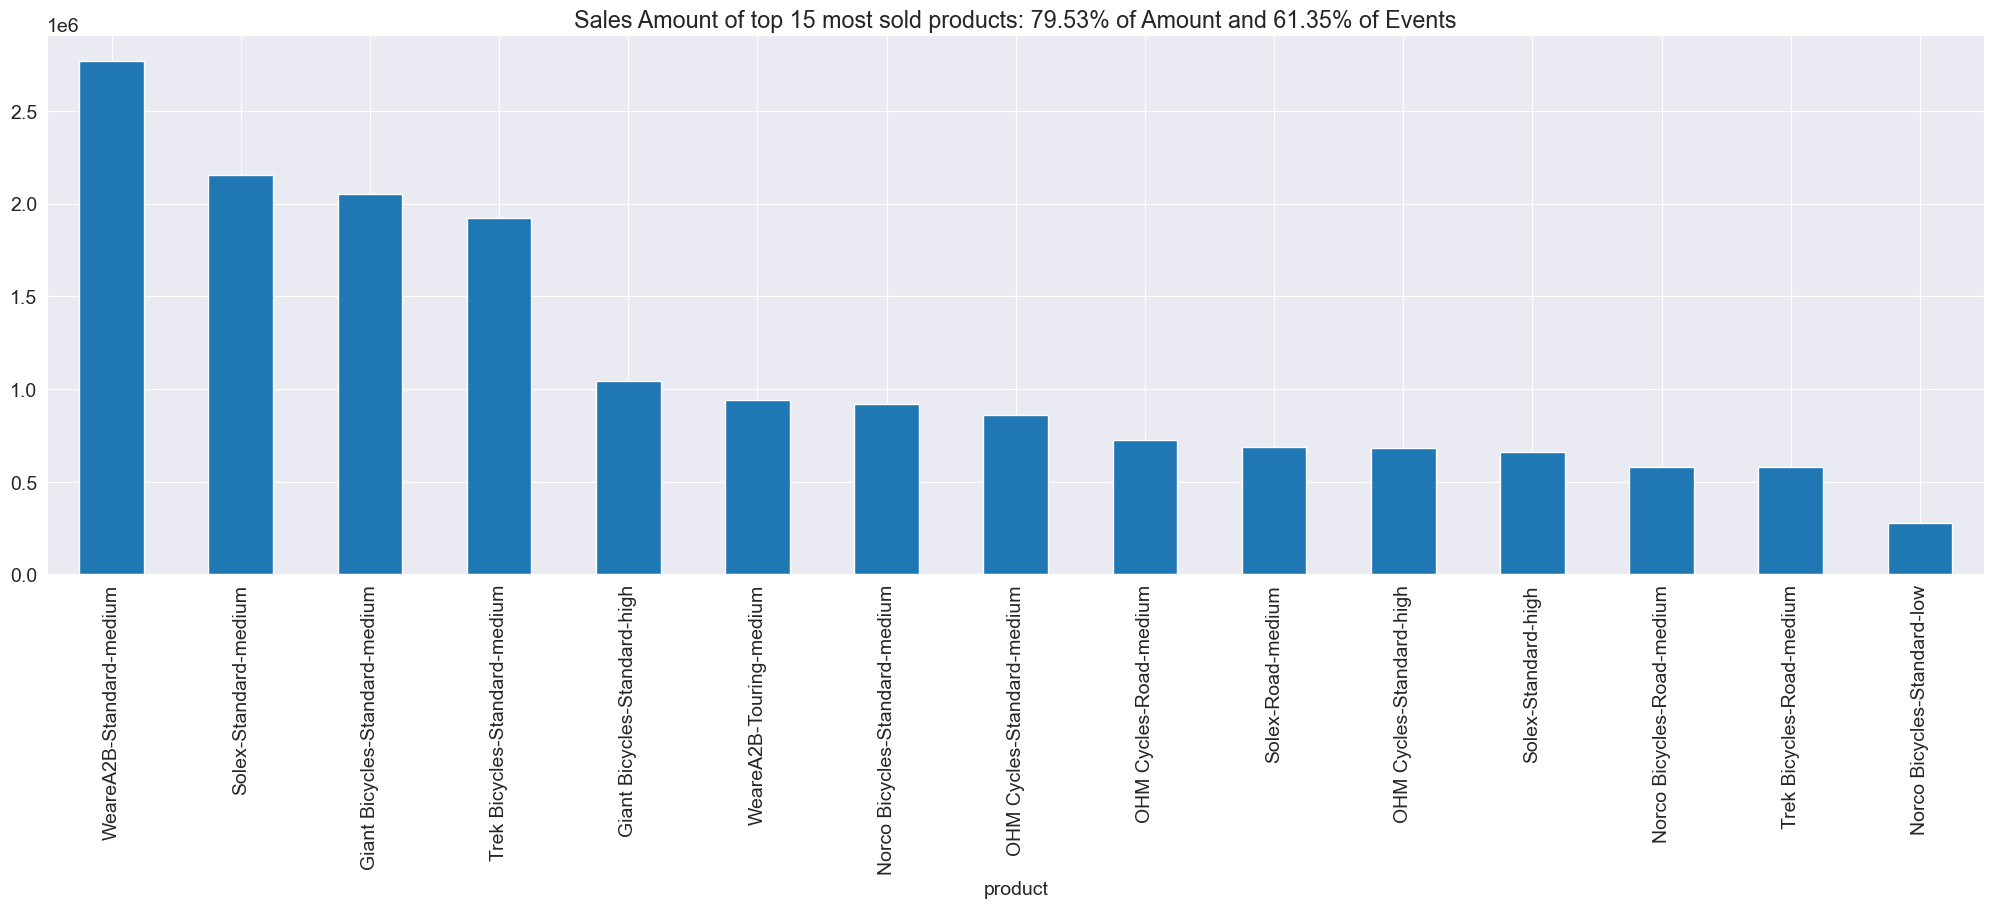

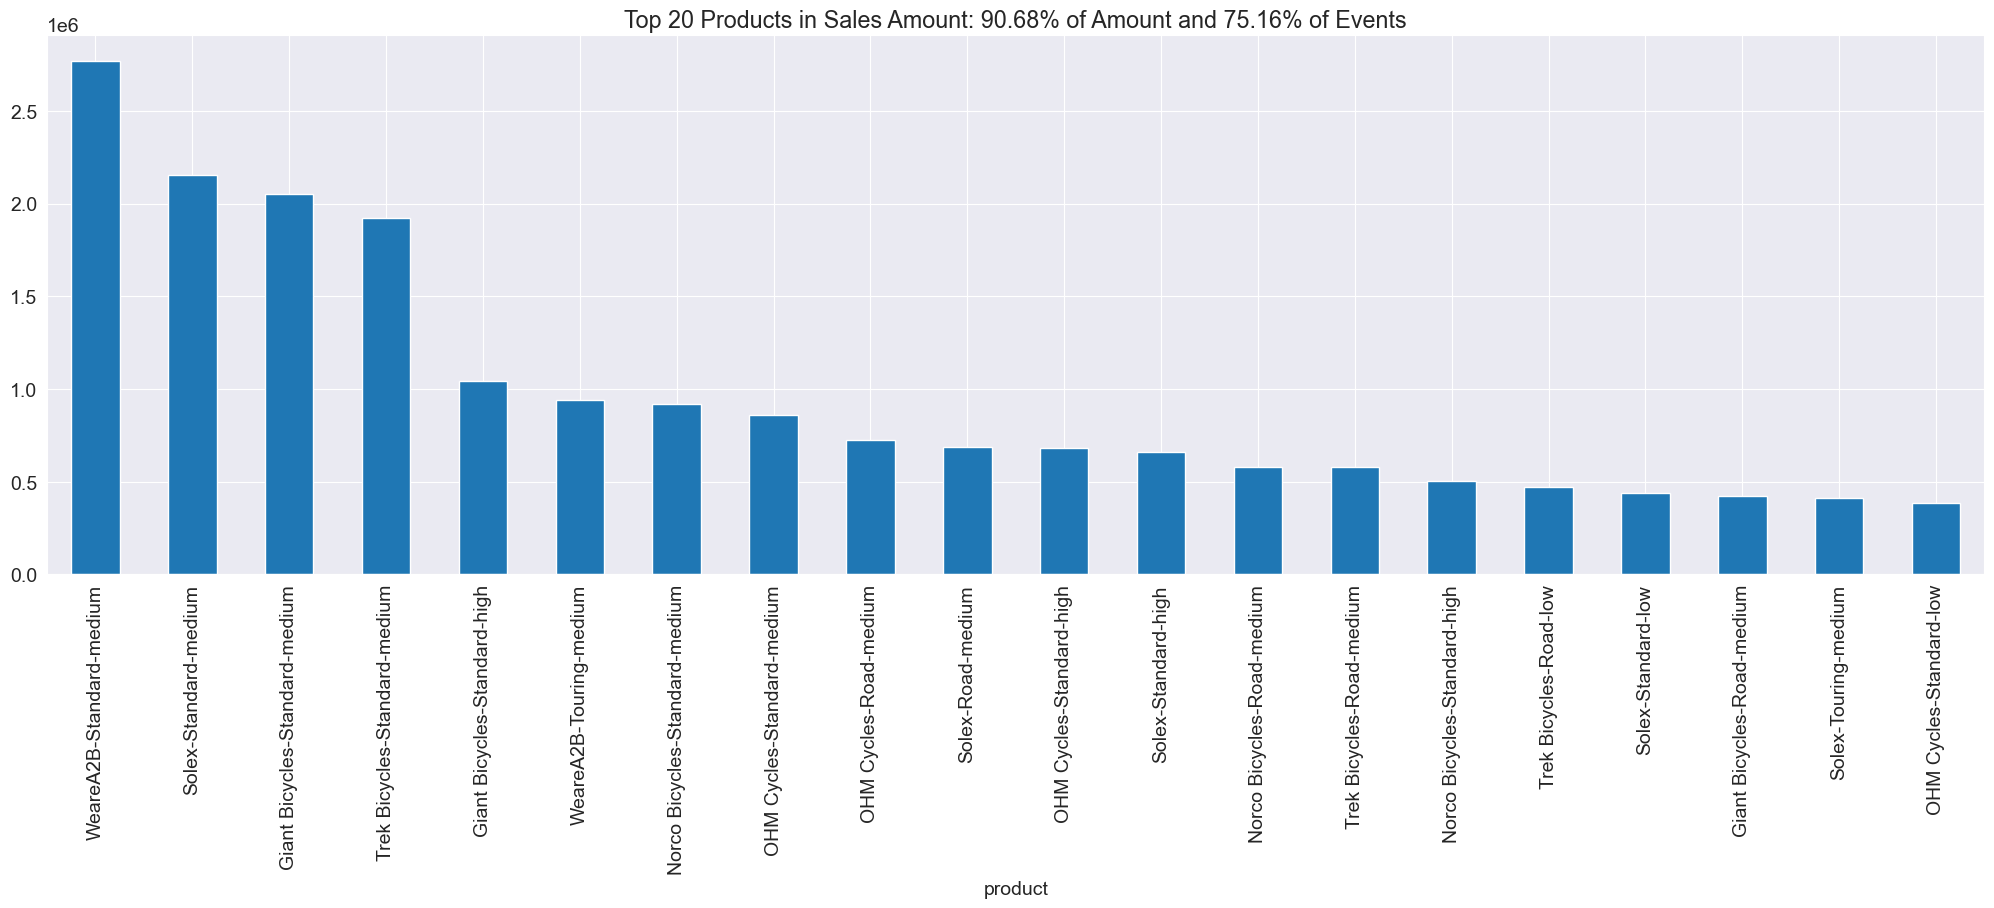

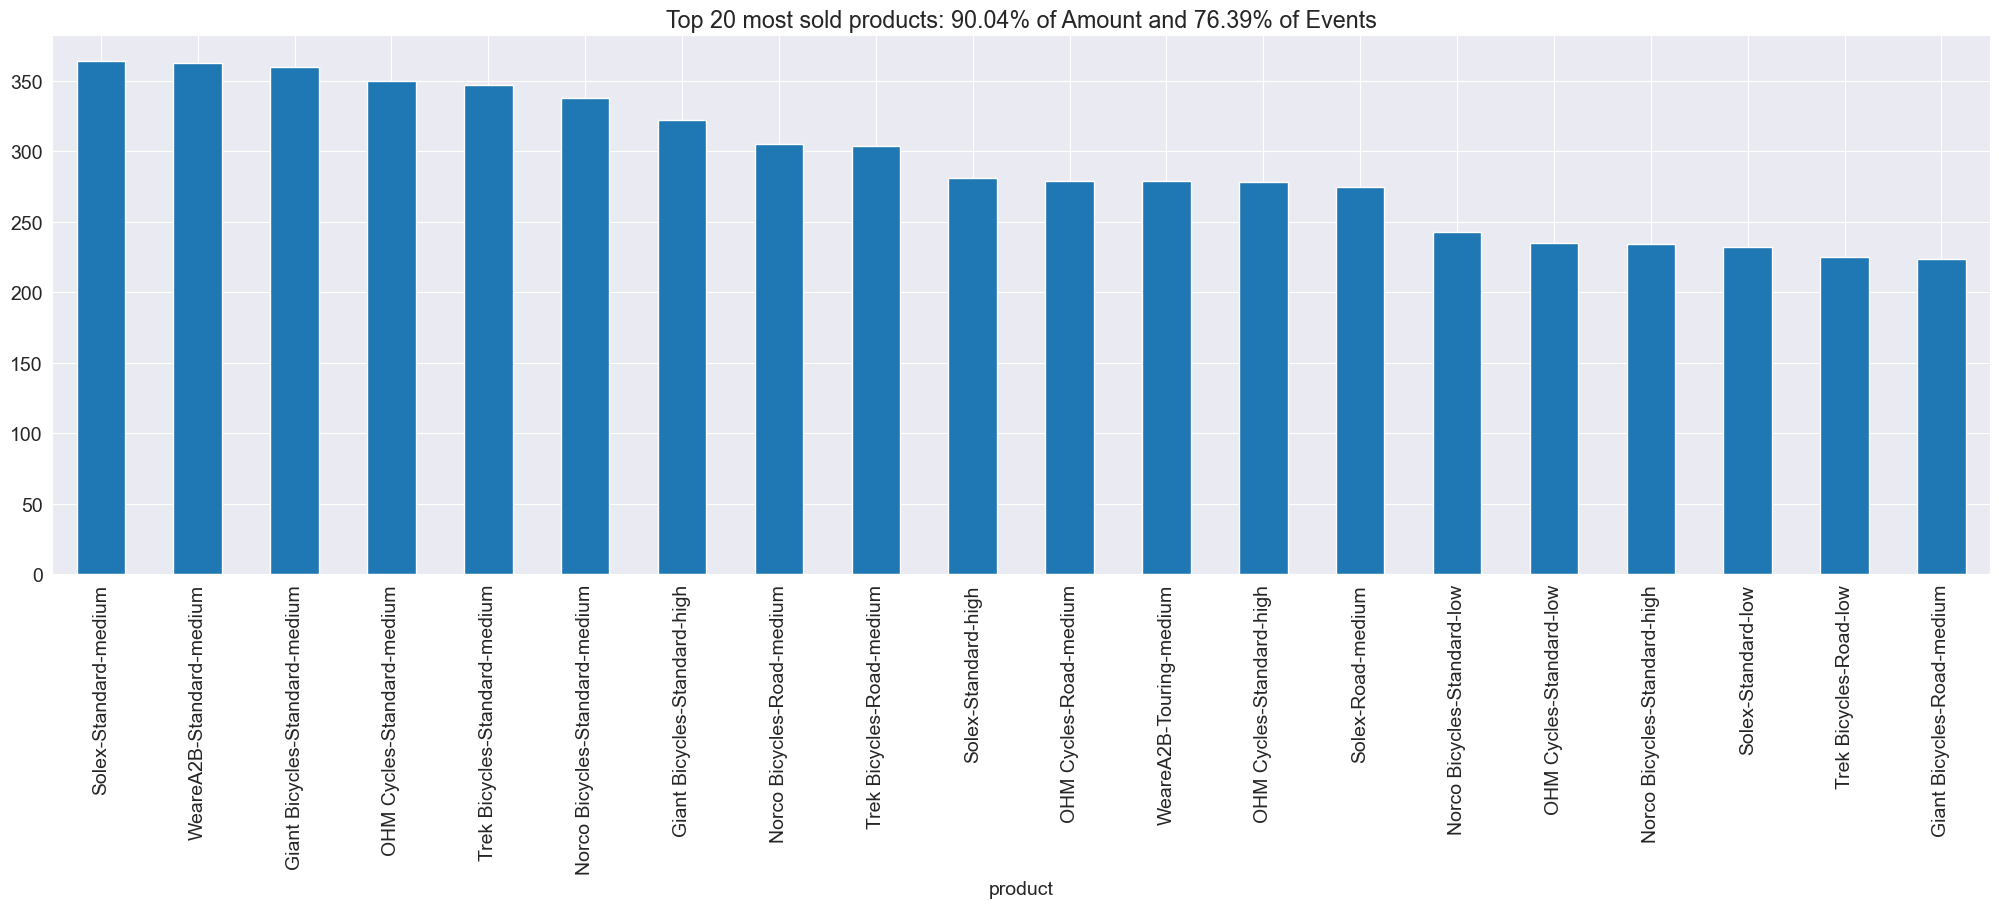

In [31]:
'''code taken from https://www.kaggle.com/code/mgmarques/customer-segmentation-and-market-basket-analysis'''

AmoutSum = df_final.groupby(["product"]).list_price.sum().sort_values(ascending = False)
inv = df_final[["product", "transaction_date"]].groupby(["product"]).transaction_date.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))

f1 = fig.add_subplot(122)
Top10Ev = list(inv[:10].index)
PercentSales =  np.round((AmoutSum[Top10Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top10Ev].\
    plot(kind='bar', title='Events of top 10 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top15ev = list(inv[:15].index)
PercentSales =  np.round((AmoutSum[Top15ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top15ev].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top15ev].sort_values(ascending = False).\
    plot(kind='bar', 
         title='Sales Amount of top 15 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top20 = list(AmoutSum[:20].index)
PercentSales =  np.round((AmoutSum[Top20].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top20].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top20].\
    plot(kind='bar', 
         title='Top 20 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top20Ev = list(inv[:20].index)
PercentSales =  np.round((AmoutSum[Top20Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top20Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top20Ev].\
    plot(kind='bar', title='Top 20 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))


In [27]:
df_newcustomer = customer_demo(df_newcustomer)
df_newcustomer.head()

,gender,Age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
full_name,,,,,,,,,
Chickie Brister,Male,66.0,86,Manufacturing,Mass Customer,Yes,14,Queensland,6
Morly Genery,Male,53.0,69,Property,Mass Customer,No,16,New South Wales,11
Ardelis Forrester,Female,49.0,10,Financial Services,Affluent Customer,No,10,Victory,5
Lucine Stutt,Female,44.0,64,Manufacturing,Affluent Customer,Yes,5,Queensland,1
Melinda Hadlee,Female,58.0,34,Financial Services,Affluent Customer,No,19,New South Wales,9


## Data Modelling<a id='tk2'></a>

### Section 1 - RFM Segmentation <a id ='rfm'></a>

In [33]:
# Calculate Recency, Frequency, and Monetary Value metrics
snapshot_date = df_final['transaction_date'].max() + pd.DateOffset(days=1)
df_final['Recency'] = (snapshot_date - df_final['transaction_date']).dt.days
df_rfm = df_final.groupby('customer_id').agg({
    'Recency': 'min',
    'transaction_id': 'count',
    'list_price': 'sum'}).reset_index()

In [34]:
# Rename the columns
df_rfm.rename(columns={'transaction_id': 'Frequency', 'list_price': 'MonetaryValue'}, inplace=True)

In [35]:
# Create RFM segments based on quartiles
rfm_segments = pd.qcut(df_rfm['Recency'], q=4, labels=['4', '3', '2', '1'])
df_rfm['R'] = rfm_segments.values
df_rfm['F'] = pd.qcut(df_rfm['Frequency'], q=4, labels=['1', '2', '3', '4'])
df_rfm['M'] = pd.qcut(df_rfm['MonetaryValue'], q=4, labels=['1', '2', '3', '4'])

In [36]:
# Calculate RFM score
df_rfm['RFM_Score'] = df_rfm['R'].astype(str) + df_rfm['F'].astype(str) + df_rfm['M'].astype(str)

In [37]:
df_rfm = df_rfm.drop(['R','M','F'], axis = 1)
df_rfm.head()

,customer_id,Recency,Frequency,MonetaryValue,RFM_Score
0,1,8,11,9084.45,444
1,2,129,3,4149.07,111
2,4,196,2,1047.72,111
3,5,17,6,5903.20,422
4,6,65,5,5931.69,222


In [38]:
# Perform RFM segmentation
segments = {
    'Best Customers': ['444'],
    'Loyal Customers': ['344', '443', '343','434',"424"],
    'Big Spenders': ['334', '343', '433', '244',"442"],
    'Potential Loyalists': ['234', '324', '243','423', '432', '342'],
    'Promising Customers': ['333', '332', '233', '323', '413', '341', '431', '134', '143', "314"],
    'Needs Attention': ["422", '214', '421', '241', '124', '142', "331","133", "224", "242","232", "313","412"],
    'About to Sleep': ['231',"212", "222", "223","221","122","133","144", "322","312", "321","231", "213", "132"],
    'At Risk': ['141', '142', '241','112','113','114',"141","131","121","311", "123", "411", "211"],
    'Lost Customers': ['111']}

df_rfm['Segment'] = df_rfm['RFM_Score'].map(lambda x: [k for k, v in segments.items() if x in v][0] if any(x in v for v in segments.values()) else 'Other')


In [39]:
df_rfm.head()

,customer_id,Recency,Frequency,MonetaryValue,RFM_Score,Segment
0,1,8,11,9084.45,444,Best Customers
1,2,129,3,4149.07,111,Lost Customers
2,4,196,2,1047.72,111,Lost Customers
3,5,17,6,5903.20,422,Needs Attention
4,6,65,5,5931.69,222,About to Sleep


In [40]:
df_customer_rfm = merge_dataframe(df1,df_rfm, "customer_id")
df_customer_rfm.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,address,postcode,state,property_valuation,Recency,Frequency,MonetaryValue,RFM_Score,Segment
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,060 Morning Avenue,2016,New South Wales,10,8,11,9084.45,444,Best Customers
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,42.0,6 Meadow Vale Court,2153,New South Wales,10,129,3,4149.07,111,Lost Customers
2,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,No,7.0,62.0,0 Holy Cross Court,4211,Queensland,9,196,2,1047.72,111,Lost Customers
3,5,Sheila-kathryn,Calton,Female,56,Senior Editor,Manufacturing,Affluent Customer,Yes,8.0,46.0,17979 Del Mar Point,2448,New South Wales,4,17,6,5903.20,422,Needs Attention
4,6,Curr,Duckhouse,Male,35,NaN,Retail,High Net Worth,Yes,13.0,57.0,9 Oakridge Court,3216,Victoria,9,65,5,5931.69,222,About to Sleep


### Section 2 - Preprocessing <a id ='pre'></a>

In [41]:
def customer_demo(df):
    df = df[['gender','Age','past_3_years_bike_related_purchases','job_industry_category','wealth_segment','owns_car',
            'tenure','state','property_valuation']]
    return df


In [43]:
df_train = customer_demo(df_customer_rfm)
df_train.head()

,gender,Age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,Female,70.0,93,Health,Mass Customer,Yes,11.0,New South Wales,10
1,Male,42.0,81,Financial Services,Mass Customer,Yes,16.0,New South Wales,10
2,Male,62.0,33,IT,Mass Customer,No,7.0,Queensland,9
3,Female,46.0,56,Manufacturing,Affluent Customer,Yes,8.0,New South Wales,4
4,Male,57.0,35,Retail,High Net Worth,Yes,13.0,Victoria,9


In [45]:
df_train.isna().sum()

gender                                 0
Age                                    0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
dtype: int64

In [48]:
df_train = pd.get_dummies(df_train, drop_first = False, columns=['gender',"job_industry_category", "wealth_segment",
                                                               "owns_car","state"])
df_train.head()

,Age,past_3_years_bike_related_purchases,tenure,property_valuation,gender_Female,gender_Male,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_New South Wales,state_Queensland,state_Victoria
0,70.0,93,11.0,10,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
1,42.0,81,16.0,10,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2,62.0,33,7.0,9,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
3,46.0,56,8.0,4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
4,57.0,35,13.0,9,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1


In [95]:

df_train_scaled = StandardScaler().fit_transform(df_train)

In [125]:
df_train_scaled

array([[ 1.93493216,  1.536609  ,  0.05633985, ...,  0.93332288,
        -0.52090119, -0.58062268],
       [-0.29049264,  1.11777939,  0.93787753, ...,  0.93332288,
        -0.52090119, -0.58062268],
       [ 1.2990965 , -0.55753903, -0.6488903 , ..., -1.07144057,
         1.91974987, -0.58062268],
       ...,
       [-1.4826845 , -0.73205136, -1.00150537, ..., -1.07144057,
        -0.52090119,  1.7222889 ],
       [-0.13153372, -0.6971489 , -0.6488903 , ..., -1.07144057,
         1.91974987, -0.58062268],
       [ 0.82221976,  0.76875472,  1.11418506, ...,  0.93332288,
        -0.52090119, -0.58062268]])

### Section 3 - Data Training - Elbow Method<a id ='dt'></a>

In [138]:
# Fit K-means and evaluate inertia for different values of k.

num_clusters = [i for i in range(2, 16)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints. 
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [139]:
inertia = kmeans_inertia(num_clusters, df_train_scaled)
inertia

[71606.53742656732,
 67798.86782935278,
 63962.638983884695,
 61972.61143622138,
 59279.758170673886,
 55447.17862664263,
 54741.54124872646,
 51505.013406738464,
 48965.012881333576,
 45741.08807362319,
 44820.48272931912,
 41438.58740924079,
 40453.81022661571,
 39284.86593202739]

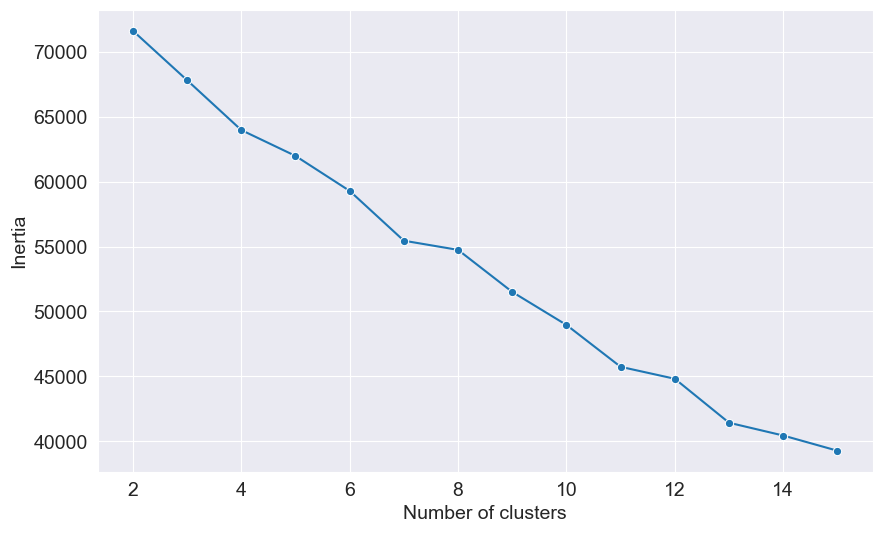

In [140]:
# Create a line plot.
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

In [141]:
# Evaluate silhouette score.

def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value. 
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, df_train_scaled)
sil_score

[0.09289981009775383,
 0.09510102201483006,
 0.09573980685567761,
 0.124891333747526,
 0.10464541057746335,
 0.15523394507568747,
 0.1308880801850098,
 0.1428359491784664,
 0.13679428060057439,
 0.13707492420212689,
 0.14060760135245431,
 0.17726915091014653,
 0.15199614186643523,
 0.14615757217589243]

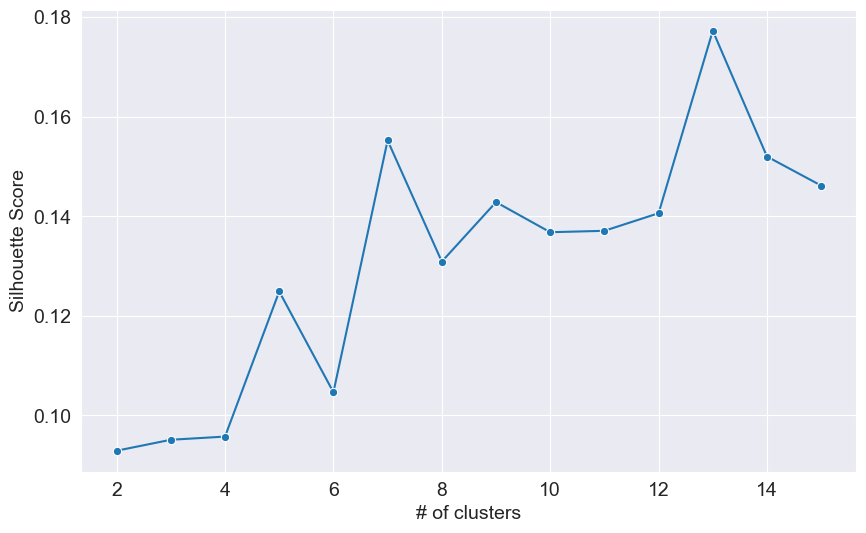

In [142]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

from the graph, the optimal k clusters is 13 with the highest Silhouette Score

In [143]:
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(df_train)

KMeans(n_clusters=13, random_state=42)

In [131]:
# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(df_train, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2930916940863553


In [132]:
df_customer_rfm['cluster'] = kmeans.labels_
df_customer_rfm.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,address,postcode,state,property_valuation,Recency,Frequency,MonetaryValue,RFM_Score,Segment,cluster
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,70.0,060 Morning Avenue,2016,New South Wales,10,8,11,9084.45,444,Best Customers,10
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,42.0,6 Meadow Vale Court,2153,New South Wales,10,129,3,4149.07,111,Lost Customers,9
2,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,No,7.0,62.0,0 Holy Cross Court,4211,Queensland,9,196,2,1047.72,111,Lost Customers,2
3,5,Sheila-kathryn,Calton,Female,56,Senior Editor,Manufacturing,Affluent Customer,Yes,8.0,46.0,17979 Del Mar Point,2448,New South Wales,4,17,6,5903.20,422,Needs Attention,12
4,6,Curr,Duckhouse,Male,35,NaN,Retail,High Net Worth,Yes,13.0,57.0,9 Oakridge Court,3216,Victoria,9,65,5,5931.69,222,About to Sleep,2


In [133]:
df_customer_rfm.groupby(['cluster']).size().reset_index(name='customer_count')

,cluster,customer_count
0,0,286
1,1,323
2,2,235
3,3,212
4,4,229
5,5,193
6,6,265
7,7,380
8,8,194
9,9,327


In [136]:
df_customer_rfm.groupby(['cluster']).agg({"Recency":"mean","Frequency":"mean","MonetaryValue":"mean"})

,Recency,Frequency,MonetaryValue
cluster,,,
0,64.870629,5.615385,6221.090490
1,62.879257,5.804954,6362.487276
2,59.472340,5.885106,6630.457872
3,63.688679,5.665094,6337.536604
4,60.873362,5.703057,6319.184017
5,66.823834,5.564767,6009.266477
6,60.667925,5.630189,6201.125170
7,65.210526,5.497368,6026.770711
8,57.840206,5.850515,6598.014691


## Conclusion and Recommendation<a id ='cr'></a>

* `Female` customers account for a significant portion of total orders. Stakeholders can tailor marketing efforts to  females and recognizing their important in driving sales.
* `New South Wales` also account for a significant portion of total orders.  Stakeholders should develop strategy marketing campaign to drive sales.
* Customers in the `Manufacturing` and `Financial Services` sectors have the highest number of orders, making them an important customer to target. The stakeholder can device effective marketing campaign to attract them and possibly retain them.
* `WeareA2b Standard Medium`, `Solex Standard Medium`, and `Giant Bicyle Standard Medium` are top 3 products with the highest sales, indicating their popularity and potential for increased sales.

## Reference<a id ='ref'></a>
* [Kaggle Kernel](https://www.kaggle.com/code/mgmarques/customer-segmentation-and-market-basket-analysis)
* [Matplotlib Documentation](https://matplotlib.org/stable/index.html)